<a href="https://colab.research.google.com/github/Cristian-Larzabal/Data_science/blob/main/EntregaFinal/ProyectoParteIII%2BLarzabal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega Final

Archivo: ProyectoParteIII+Larzabal.ipynb


---



# Abstract

Este proyecto utiliza el dataset “Melbourne Housing Snapshot” proveniente de Kaggle, que reúne información detallada sobre más de 30.000 propiedades vendidas en la ciudad de Melbourne, Australia. La base de datos incluye una amplia variedad de atributos que describen tanto las características físicas de las viviendas como su contexto geográfico y temporal. Entre las principales variables se encuentran el tipo de vivienda, el precio de venta, la cantidad de dormitorios y baños, la superficie construida, el tamaño del terreno, el suburbio donde se localiza, la distancia al centro de la ciudad, el año de construcción, así como indicadores del entorno inmediato. Esta riqueza de información permite abordar un análisis integral del mercado inmobiliario de Melbourne.

Para ello se aplican técnicas de análisis univariado, bivariado y multivariado utilizando herramientas como pandas, Matplotlib y Seaborn. Se inicia con un proceso de limpieza de datos, detección de valores faltantes y tratamiento de outliers, seguido de la generación de visualizaciones que facilitan la interpretación de los resultados. Este análisis exploratorio no solo permite describir el comportamiento del mercado inmobiliario de Melbourne, sino que también sienta las bases para futuros modelos de predicción de precios, segmentación de propiedades o recomendaciones personalizadas para compradores e inversores.


---



# Preguntas / Hipótesis de interés


*   ¿Cuánto cuestan las propiedades “promedio”?
*   ¿Se observa que propiedades más cercanas al centro son más caras?
*   ¿Cómo se distribuyen los precios de venta de las propiedades según su tipo de vivienda?
*   ¿Cómo varía el precio promedio de las propiedades según la cantidad de dormitorios y el tipo de vivienda?




---



# Objetivo del Proyecto
El objetivo del proyecto es explorar el mercado inmobiliario desde una perspectiva descriptiva y visual, identificando patrones y relaciones significativas entre las distintas características de las propiedades y su valor de mercado. En particular, se busca responder preguntas sobre la distribución de precios, las diferencias entre suburbios y tipos de vivienda, la influencia del tamaño y la antigüedad de la propiedad en su precio, y cómo varían estas tendencias según el contexto geográfico y temporal.


---



# Visualizaciones y Análisis


---



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/Cristian-Larzabal/Data_science/refs/heads/main/PrimerEntrega/melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Missing Values

In [ ]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0
BuildingArea,6450
YearBuilt,5375
CouncilArea,1369
Car,62


# Análisis Univariado


Cuartiles de Price:
Q1: 650000.0
Q2 (mediana): 903000.0
Q3: 1330000.0
IQR: 680000.0

Cantidad de outliers detectados: 612


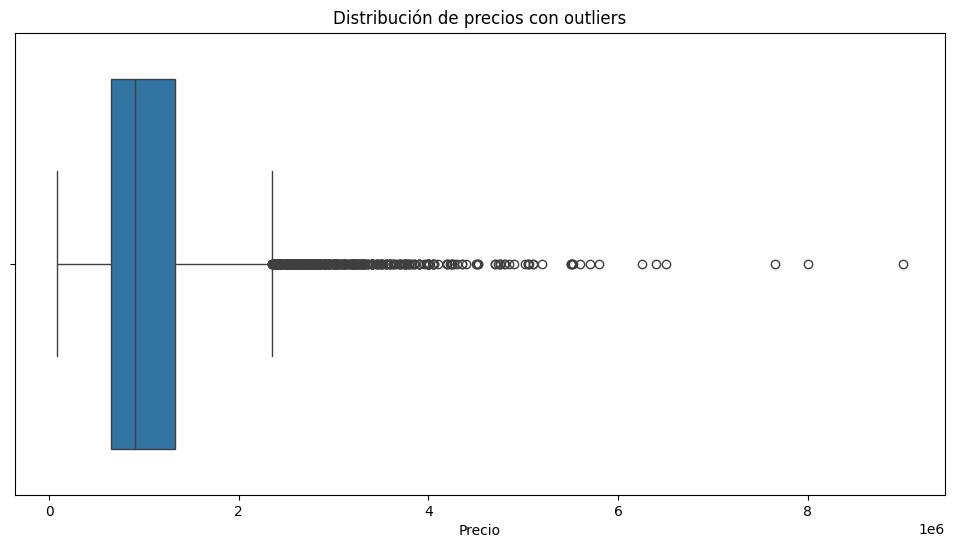

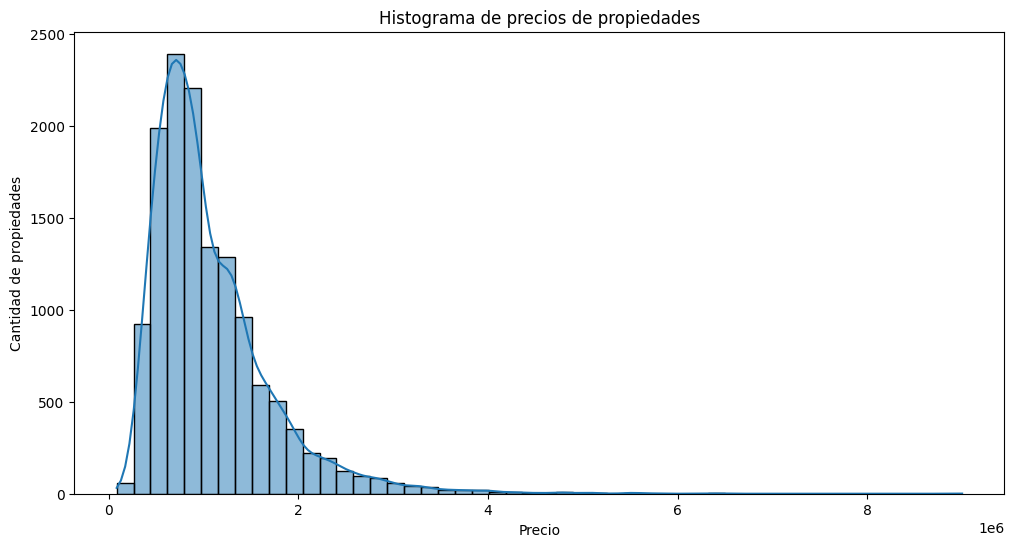

In [ ]:
# 🔹 Calcular cuartiles y IQR
Q1 = df['Price'].quantile(0.25)
Q2 = df['Price'].quantile(0.50)  # mediana
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

print("\nCuartiles de Price:")
print("Q1:", Q1)
print("Q2 (mediana):", Q2)
print("Q3:", Q3)
print("IQR:", IQR)

# 🔹 Detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print("\nCantidad de outliers detectados:", outliers.shape[0])

# 🔹 Visualización: boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Price'])
plt.title("Distribución de precios con outliers")
plt.xlabel("Precio")
plt.show()

print(" ")#Separacion entre graficos

# 🔹 Visualización: histograma
plt.figure(figsize=(12,6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Histograma de precios de propiedades")
plt.xlabel("Precio")
plt.ylabel("Cantidad de propiedades")
plt.show()

# Análisis bivariado

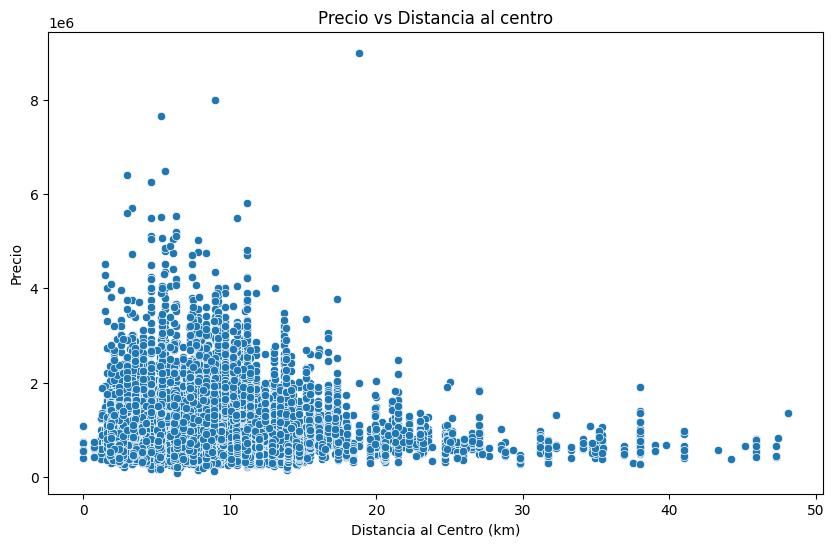

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Distance', y='Price', data=df)
plt.title("Precio vs Distancia al centro")
plt.xlabel("Distancia al Centro (km)")
plt.ylabel("Precio")
plt.show()

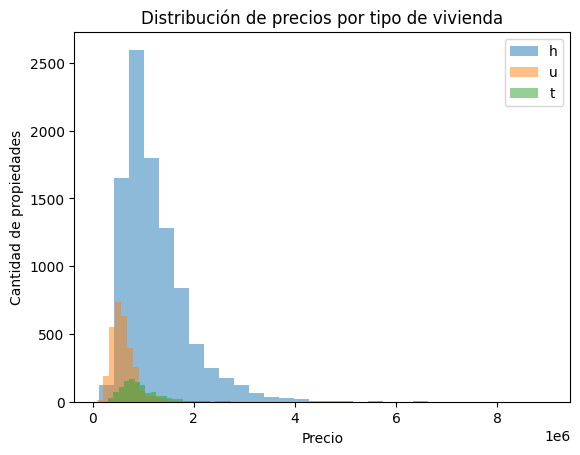

In [ ]:
types = df['Type'].unique()
for t in types:
    subset = df[df['Type']==t]
    plt.hist(subset['Price'], bins=30, alpha=0.5, label=t)
#Tipo de vivienda
#h - casa, cabaña, villa, adosada, terraza
#u - unidad, dúplex
#t - casa adosada; dev site - sitio de desarrollo
plt.title("Distribución de precios por tipo de vivienda")
plt.xlabel("Precio")
plt.ylabel("Cantidad de propiedades")
plt.legend()
plt.show()

# Análisis multivariado


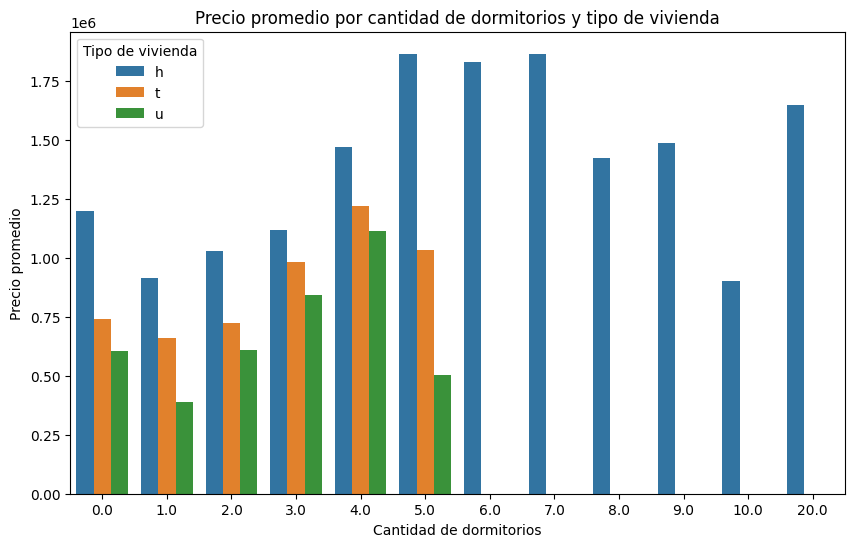

In [ ]:
# Calcular precio promedio por tipo y cantidad de dormitorios
avg_price = df.groupby(['Bedroom2','Type'])['Price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_price, x='Bedroom2', y='Price', hue='Type')
plt.title("Precio promedio por cantidad de dormitorios y tipo de vivienda")
plt.xlabel("Cantidad de dormitorios")
plt.ylabel("Precio promedio")
plt.legend(title="Tipo de vivienda")
plt.show()



---


# Conclusiones
Dado las preguntas realizadas podemos dar estar respuestas gracias a los analisis realizados:

*  El precio promedio (media) de las propiedades es aproximadamente 1.1 millon , con un precio mediano de 940.000. Los valores se distribuyen entre 80.000 y $5.000.000, indicando que la mayoría de las propiedades se concentran alrededor del rango medio, aunque hay algunos outliers de precios muy altos.

*   Sí, se observa una tendencia general donde las propiedades más cercanas al centro de Melbourne tienden a tener precios más altos, aunque hay cierta dispersión. A medida que aumenta la distancia, los precios promedio disminuyen, pero algunos suburbios lejanos todavía presentan propiedades caras.

*   Las casas (h) tienen la mayor concentración de precios altos, mientras que las unidades (u) suelen concentrarse en rangos de precios más bajos. Los townhouses (t) tienen una distribución más dispersa. Esto muestra que el tipo de vivienda influye significativamente en el rango de precios de venta.

*   En general, a mayor cantidad de dormitorios, mayor es el precio promedio, pero la magnitud depende del tipo de vivienda. Las casas (h) tienen precios más altos que las unidades o townhouses para la misma cantidad de dormitorios. Por ejemplo, una casa de 3 dormitorios es más cara que una unidad de 3 dormitorios. Esto confirma que tipo de vivienda y número de dormitorios juntos afectan significativamente el precio.


## 🏠 Abstract – Análisis del Precio de Viviendas en Melbourne

El presente análisis se enfoca en la exploración de los factores que influyen en el valor de las propiedades residenciales en la ciudad de Melbourne, con especial énfasis en la relación entre el precio de venta (Price) y la distancia al centro de negocios (Distance). El conjunto de datos proviene del Melbourne Housing Snapshot y contiene información sobre más de 13 000 viviendas, incluyendo características estructurales (número de habitaciones, baños, tipo de propiedad), ubicación geográfica y variables de entorno urbano.

De manera descriptiva, se observa una alta variabilidad en los precios, con concentraciones elevadas en zonas más cercanas al centro. Las viviendas unifamiliares (houses) representan la mayor proporción del conjunto, seguidas por departamentos (units) y propiedades adosadas (townhouses). Las variables numéricas presentan una distribución asimétrica, lo que sugiere la presencia de valores extremos asociados a áreas de alta demanda o propiedades de lujo.

El objetivo principal de este trabajo es determinar si existe una relación lineal significativa entre el precio de las propiedades y su distancia al centro de Melbourne. Para ello, se plantea la siguiente hipótesis:
H: Existe una relación lineal negativa significativa entre la distancia al centro y el precio de las viviendas (a mayor distancia, menor precio).

Este análisis se llevará a cabo mediante un modelo de Regresión Lineal Simple, complementado con un examen exploratorio de los datos (EDA) y la evaluación de supuestos estadísticos. Los resultados permitirán comprender mejor la dinámica espacial del mercado inmobiliario melburniano y servirán como base para futuros modelos predictivos multivariados.

🏘️ **Estructura del dataset**:



Suburb: Suburbio o zona donde se ubica la propiedad.

Address: Dirección del inmueble.

Rooms: Número de habitaciones.

Type: Tipo de vivienda (h = house, u = unit, t = townhouse).

Price: Precio de venta de la propiedad (en dólares australianos).

Method: Método de venta (por ejemplo: S = vendida, PI = bajo oferta, VB = con oferta previa, etc.).

SellerG: Nombre del agente o empresa inmobiliaria.

Date: Fecha de la transacción o publicación.

Distance: Distancia (en km) desde el centro de negocios de Melbourne (CBD).

Postcode: Código postal del área.

Bedroom2, Bathroom, Car: Cantidad de dormitorios, baños y cocheras registradas.
         
Landsize: Tamaño del terreno (en m²).

BuildingArea: Superficie construida (en m²).

CouncilArea: Jurisdicción municipal correspondiente.

Regionname: Región geográfica más amplia (por ejemplo: Northern Metropolitan, Southern Metropolitan).

Propertycount: Número de propiedades registradas en el suburbio.
Elemento de la lista


                                                  
**🔍 Observaciones iniciales:**

El dataset contiene aproximadamente 13 000 registros de propiedades en Melbourne, Australia.

El precio medio ronda los 1 000 000 AUD, aunque con una gran dispersión entre zonas céntricas y periféricas.

La mayoría de los registros corresponden a casas unifamiliares (Type = “h”), seguidas por departamentos (u) y townhouses (t).

La variable Distance varía desde menos de 1 km hasta más de 40 km, lo que permite analizar diferencias espaciales en el valor de las viviendas.

Existen valores faltantes en variables como BuildingArea y Landsize, lo que requerirá tratamiento previo al modelado.

El conjunto de datos es adecuado para análisis exploratorio (EDA) y modelos de regresión lineal, ya que combina variables numéricas y categóricas relevantes para explicar el precio de las propiedades.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/Cristian-Larzabal/Data_science/refs/heads/main/PrimerEntrega/melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
# Mostrar información general del dataset
print("Shape")
df.shape

Shape


(13580, 21)

In [4]:
print("Columns")
df.columns

Columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

In [7]:
def analyze_missing_values(df):

    # Calcular valores nulos
    missing_values = df.isna().sum()
    missing_percentage = ((df.isna().sum() / len(df)) * 100).round(2)

    # Crear DataFrame
    missing_df = pd.DataFrame({
        "Cantidad_Nulos": missing_values,
        "Porcentaje_Nulos": missing_percentage
    })

    # Ordenar por porcentaje de nulos
    missing_df = missing_df.sort_values(by="Porcentaje_Nulos", ascending=False)
    return missing_df

In [8]:
missing_df = analyze_missing_values(df)
missing_df

,Cantidad_Nulos,Porcentaje_Nulos
buildingarea,6450,47.50
yearbuilt,5375,39.58
councilarea,1369,10.08
car,62,0.46
suburb,0,0.00
price,0,0.00
type,0,0.00
rooms,0,0.00
address,0,0.00
distance,0,0.00


In [10]:
columns_high_missing_amount = missing_df.loc[missing_df.Porcentaje_Nulos>=10].index
columns_low_missing_amount = missing_df.loc[(missing_df.Porcentaje_Nulos<10)].index

Eliminacions de duplicados

In [11]:
def remove_duplicates_with_info(df, subset=None, keep='first'):
    print("INFORMACIÓN DE ENTRADA:")
    print(f"   - Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f"   - Duplicados totales: {df.duplicated(subset=subset).sum()}")

    if subset:
        print(f"   - Verificando duplicados en columnas: {subset}")

    original_rows = df.shape[0]

    df_clean = df.drop_duplicates(subset=subset, keep=keep)

    print("\n INFORMACIÓN DE SALIDA:")
    print(f"   - Dimensiones: {df_clean.shape[0]} filas × {df_clean.shape[1]} columnas")
    print(f"   - Duplicados restantes: {df_clean.duplicated(subset=subset).sum()}")
    print(f"   - Filas eliminadas: {original_rows - df_clean.shape[0]}")
    print(f"   - Reducción: {((original_rows - df_clean.shape[0]) / original_rows * 100):.1f}%")

    return df_clean

In [12]:
df = remove_duplicates_with_info(df)

INFORMACIÓN DE ENTRADA:
   - Dimensiones: 13580 filas × 21 columnas
   - Duplicados totales: 0

 INFORMACIÓN DE SALIDA:
   - Dimensiones: 13580 filas × 21 columnas
   - Duplicados restantes: 0
   - Filas eliminadas: 0
   - Reducción: 0.0%


In [14]:
def quick_unique_count(df, columns=None):

    if columns is None:
        columns = df.columns

    print("CONTEO DE VALORES ÚNICOS POR COLUMNA")

    for col in columns:
        if col in df.columns:

            unique_count = df[col].nunique()
            total_count = len(df[col])
            null_count = df[col].isnull().sum()
            moda_value = df[col].mode()


            print(f" {col}:")
            print(f"   • Tipo: {df[col].dtype}")
            print(f"   • Valores únicos: {unique_count:,}")
            print(f"   • Valor de la moda: {moda_value}")
            print(f"   • Total valores: {total_count:,}")
            print(f"   • Valores nulos: {null_count:,}")
            print(f"   % Únicos: {(unique_count/total_count*100):.1f}%")

            # Mostrar algunos valores únicos (especial manejo para floats)
            if unique_count <= 10:
                unique_vals = df[col].dropna().unique()
                print(f"   • Valores: {sorted(unique_vals)}")
            elif df[col].dtype in ['float64', 'float32']:
                # Para floats, mostrar rango
                min_val = df[col].min()
                max_val = df[col].max()
                print(f"   • Rango: [{min_val:.2f} - {max_val:.2f}]")
            else:
                sample_vals = df[col].dropna().unique()[:3]
                print(f"   • Ejemplos: {list(sample_vals)}")

            print("-" * 40)

In [16]:
def plot_by_dtype_subplots(df, columns=None):
    if columns is None:
        columns = df.columns.tolist()

    # Separar por tipo de dato
    numeric_cols = df[columns].select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df[columns].select_dtypes(include=['object', 'category']).columns.tolist()

    print(f"Columnas numéricas: {len(numeric_cols)}")
    print(f"Columnas categóricas: {len(categorical_cols)}")

    if numeric_cols:
        n_numeric = len(numeric_cols)
        n_rows = (n_numeric + 2) // 3
        fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))

        if n_rows == 1:
            axes = axes.reshape(1, -1)

        fig.suptitle('Distribución de Columnas Numéricas')

        for i, col in enumerate(numeric_cols):
            row = i // 3
            col_ax = i % 3
            ax = axes[row, col_ax]

            df[col].hist(bins=30, ax=ax, color='lightblue', alpha=0.7, edgecolor='black')
            ax.set_title(f'{col}\n(Únicos: {df[col].nunique()})', fontweight='bold')
            ax.set_ylabel('Frecuencia')
            ax.grid(True, alpha=0.3)

        # Ocultar ejes vacíos
        for i in range(len(numeric_cols), n_rows * 3):
            row = i // 3
            col_ax = i % 3
            axes[row, col_ax].set_visible(False)

        plt.tight_layout()
        plt.show()

    # Graficar categóricas
    if categorical_cols:
        n_categorical = len(categorical_cols)
        n_rows = (n_categorical + 2) // 3
        fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))

        if n_rows == 1:
            axes = axes.reshape(1, -3)

        fig.suptitle('Distribución de Columnas Categóricas')

        for i, col in enumerate(categorical_cols):
            row = i // 3
            col_ax = i % 3
            ax = axes[row, col_ax]

            value_counts = df[col].value_counts().head(10)  # Top 10
            bars = ax.bar(range(len(value_counts)), value_counts.values,
                         color=plt.cm.Pastel1(i / len(categorical_cols)), alpha=0.7)

            ax.set_xticks(range(len(value_counts)))
            ax.set_xticklabels([str(x)[:10] + '...' if len(str(x)) > 10 else str(x)
                              for x in value_counts.index],
                             rotation=45, ha='right', fontsize=8)

            # Añadir valores en barras
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontsize=7)

            ax.set_title(f'{col}\n(Únicos: {df[col].nunique()})', fontweight='bold')
            ax.grid(True, alpha=0.3)

        # Ocultar ejes vacíos
        for i in range(len(categorical_cols), n_rows * 3):
            row = i // 3
            col_ax = i % 3
            axes[row, col_ax].set_visible(False)

        plt.tight_layout()
        plt.show()

In [17]:
quick_unique_count(df[columns_high_missing_amount])

CONTEO DE VALORES ÚNICOS POR COLUMNA
 buildingarea:
   • Tipo: float64
   • Valores únicos: 602
   • Valor de la moda: 0    120.0
Name: buildingarea, dtype: float64
   • Total valores: 13,580
   • Valores nulos: 6,450
   % Únicos: 4.4%
   • Rango: [0.00 - 44515.00]
----------------------------------------
 yearbuilt:
   • Tipo: float64
   • Valores únicos: 144
   • Valor de la moda: 0    1970.0
Name: yearbuilt, dtype: float64
   • Total valores: 13,580
   • Valores nulos: 5,375
   % Únicos: 1.1%
   • Rango: [1196.00 - 2018.00]
----------------------------------------
 councilarea:
   • Tipo: object
   • Valores únicos: 33
   • Valor de la moda: 0    Moreland
Name: councilarea, dtype: object
   • Total valores: 13,580
   • Valores nulos: 1,369
   % Únicos: 0.2%
   • Ejemplos: ['Yarra', 'Moonee Valley', 'Port Phillip']
----------------------------------------


Columnas numéricas: 2
Columnas categóricas: 1


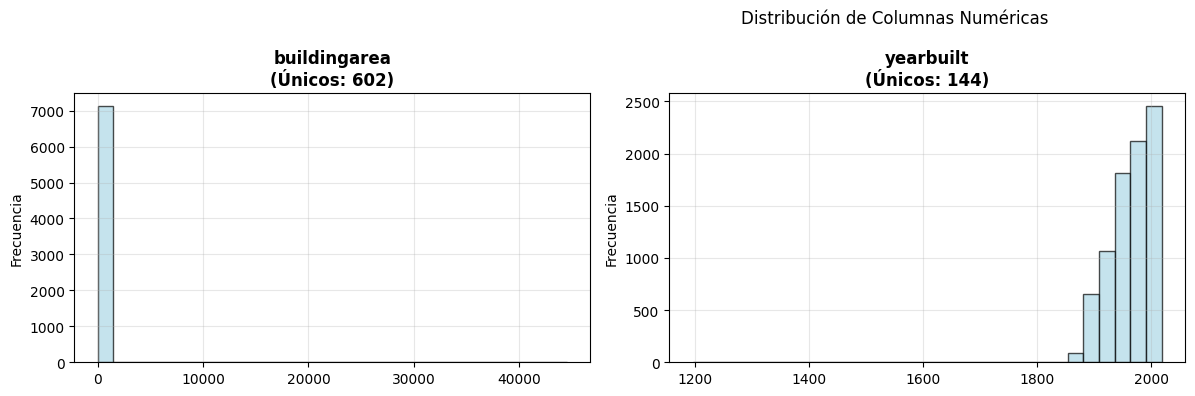

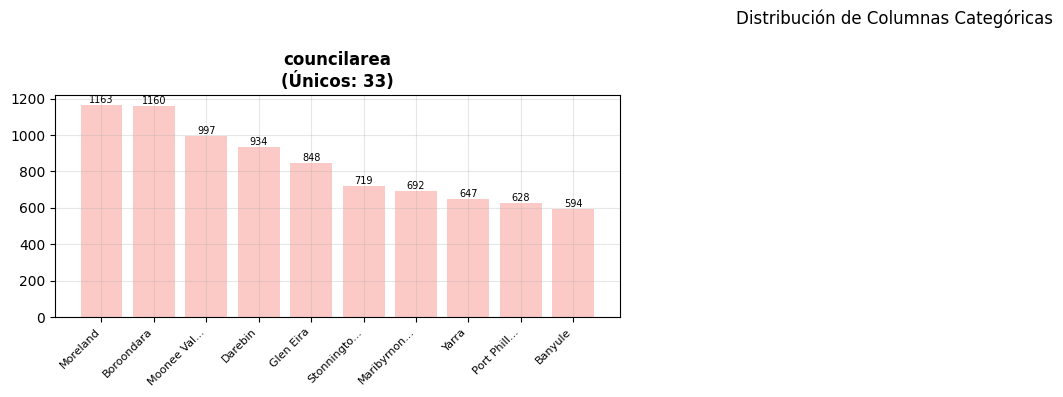

In [18]:
plot_by_dtype_subplots(df, columns_high_missing_amount)

In [19]:
quick_unique_count(df[columns_low_missing_amount])

CONTEO DE VALORES ÚNICOS POR COLUMNA
 car:
   • Tipo: float64
   • Valores únicos: 11
   • Valor de la moda: 0    2.0
Name: car, dtype: float64
   • Total valores: 13,580
   • Valores nulos: 62
   % Únicos: 0.1%
   • Rango: [0.00 - 10.00]
----------------------------------------
 suburb:
   • Tipo: object
   • Valores únicos: 314
   • Valor de la moda: 0    Reservoir
Name: suburb, dtype: object
   • Total valores: 13,580
   • Valores nulos: 0
   % Únicos: 2.3%
   • Ejemplos: ['Abbotsford', 'Airport West', 'Albert Park']
----------------------------------------
 price:
   • Tipo: float64
   • Valores únicos: 2,204
   • Valor de la moda: 0    1100000.0
Name: price, dtype: float64
   • Total valores: 13,580
   • Valores nulos: 0
   % Únicos: 16.2%
   • Rango: [85000.00 - 9000000.00]
----------------------------------------
 type:
   • Tipo: object
   • Valores únicos: 3
   • Valor de la moda: 0    h
Name: type, dtype: object
   • Total valores: 13,580
   • Valores nulos: 0
   % Únicos: 0.

Columnas numéricas: 11
Columnas categóricas: 7


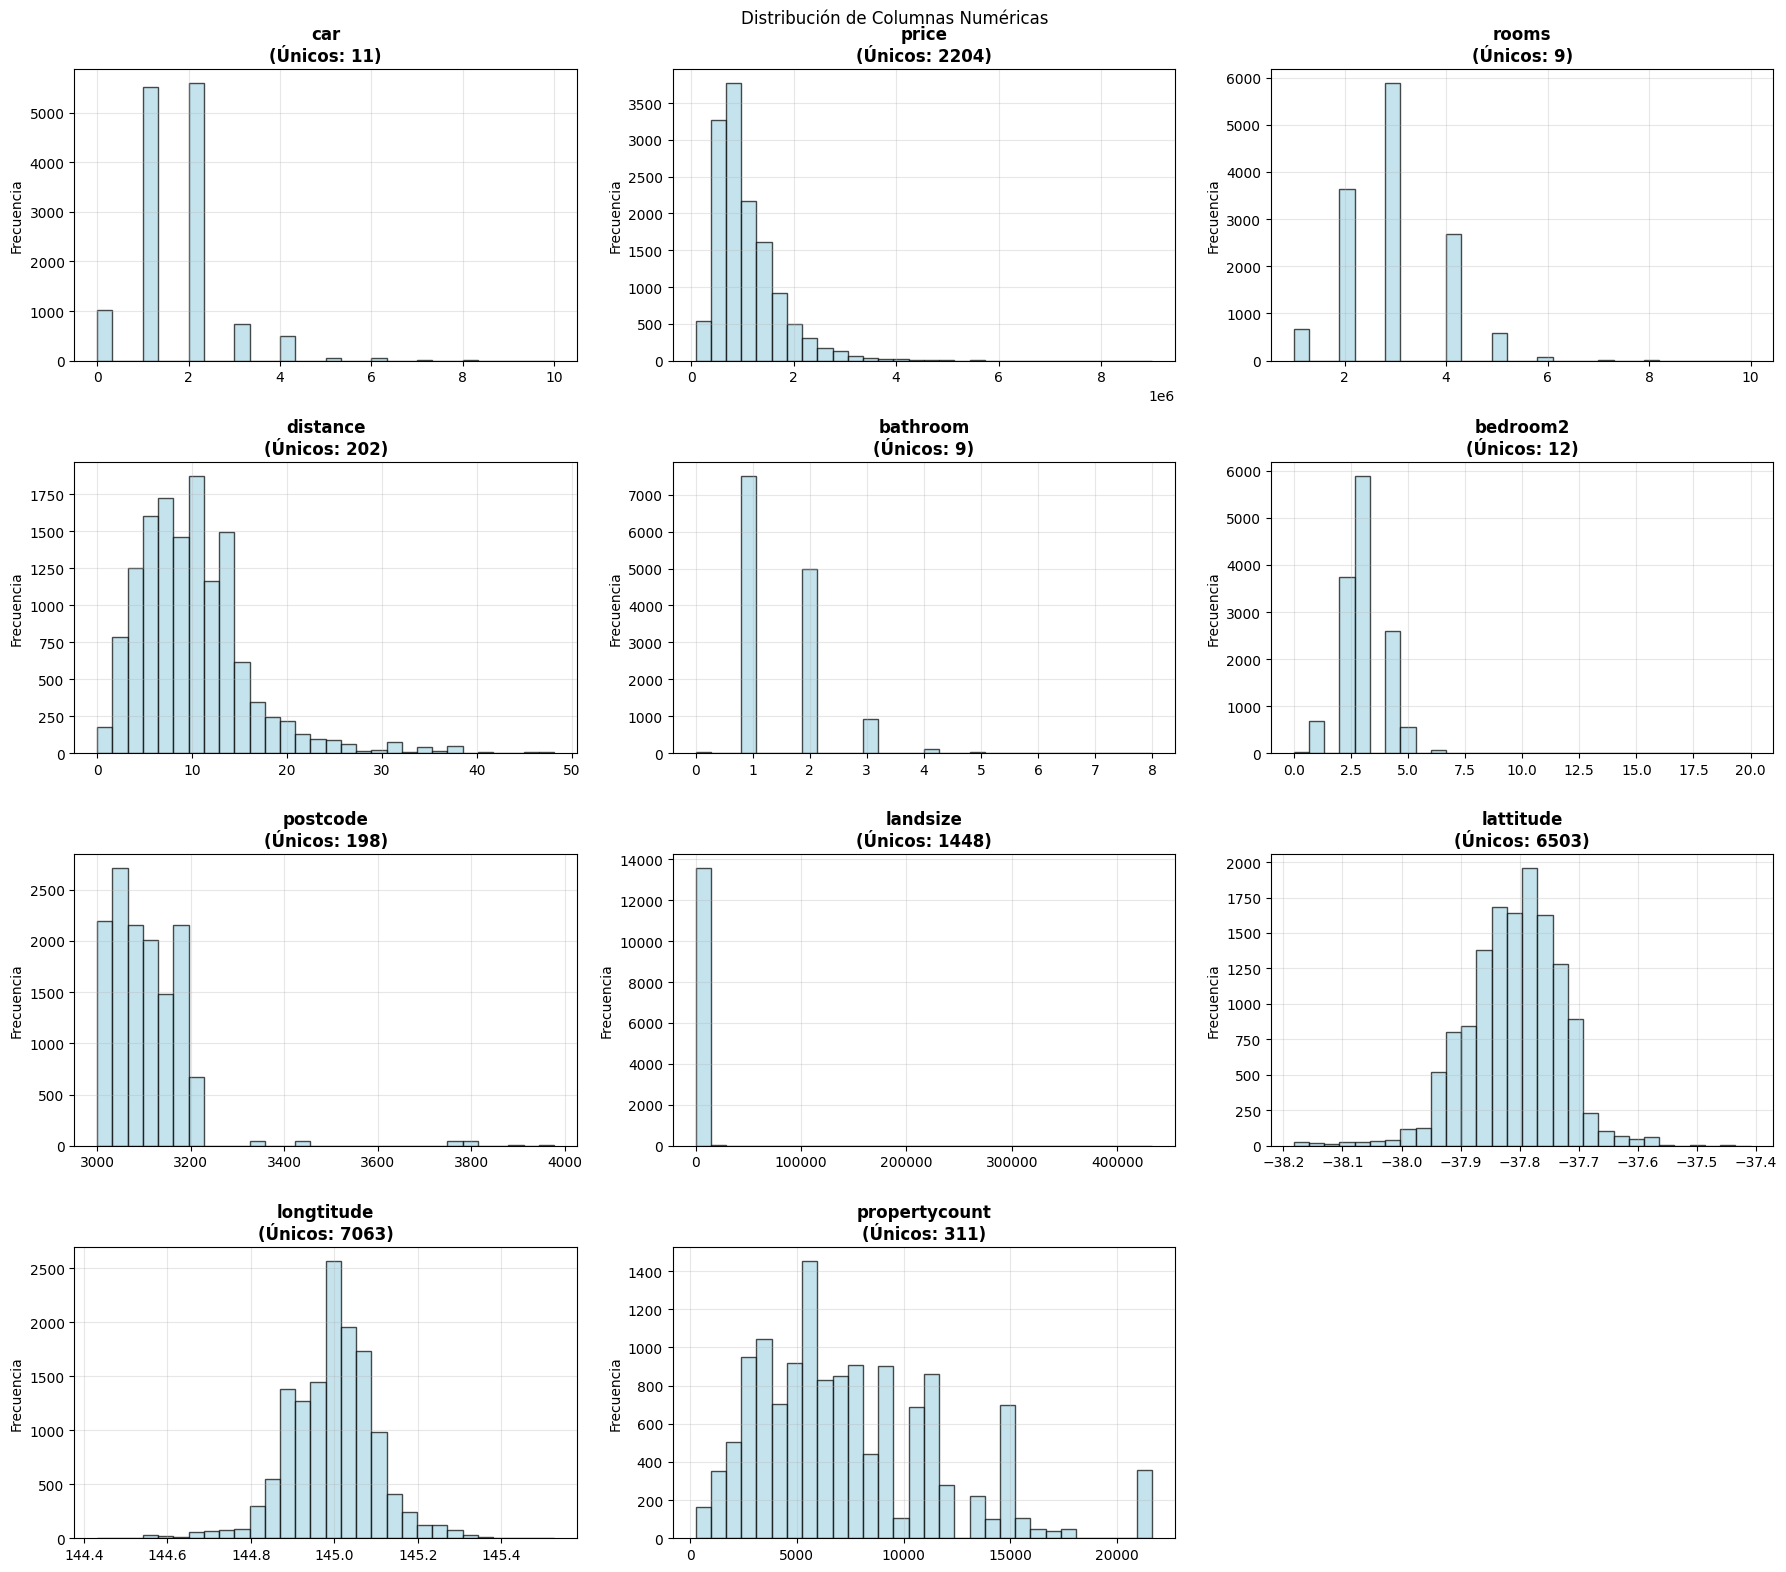

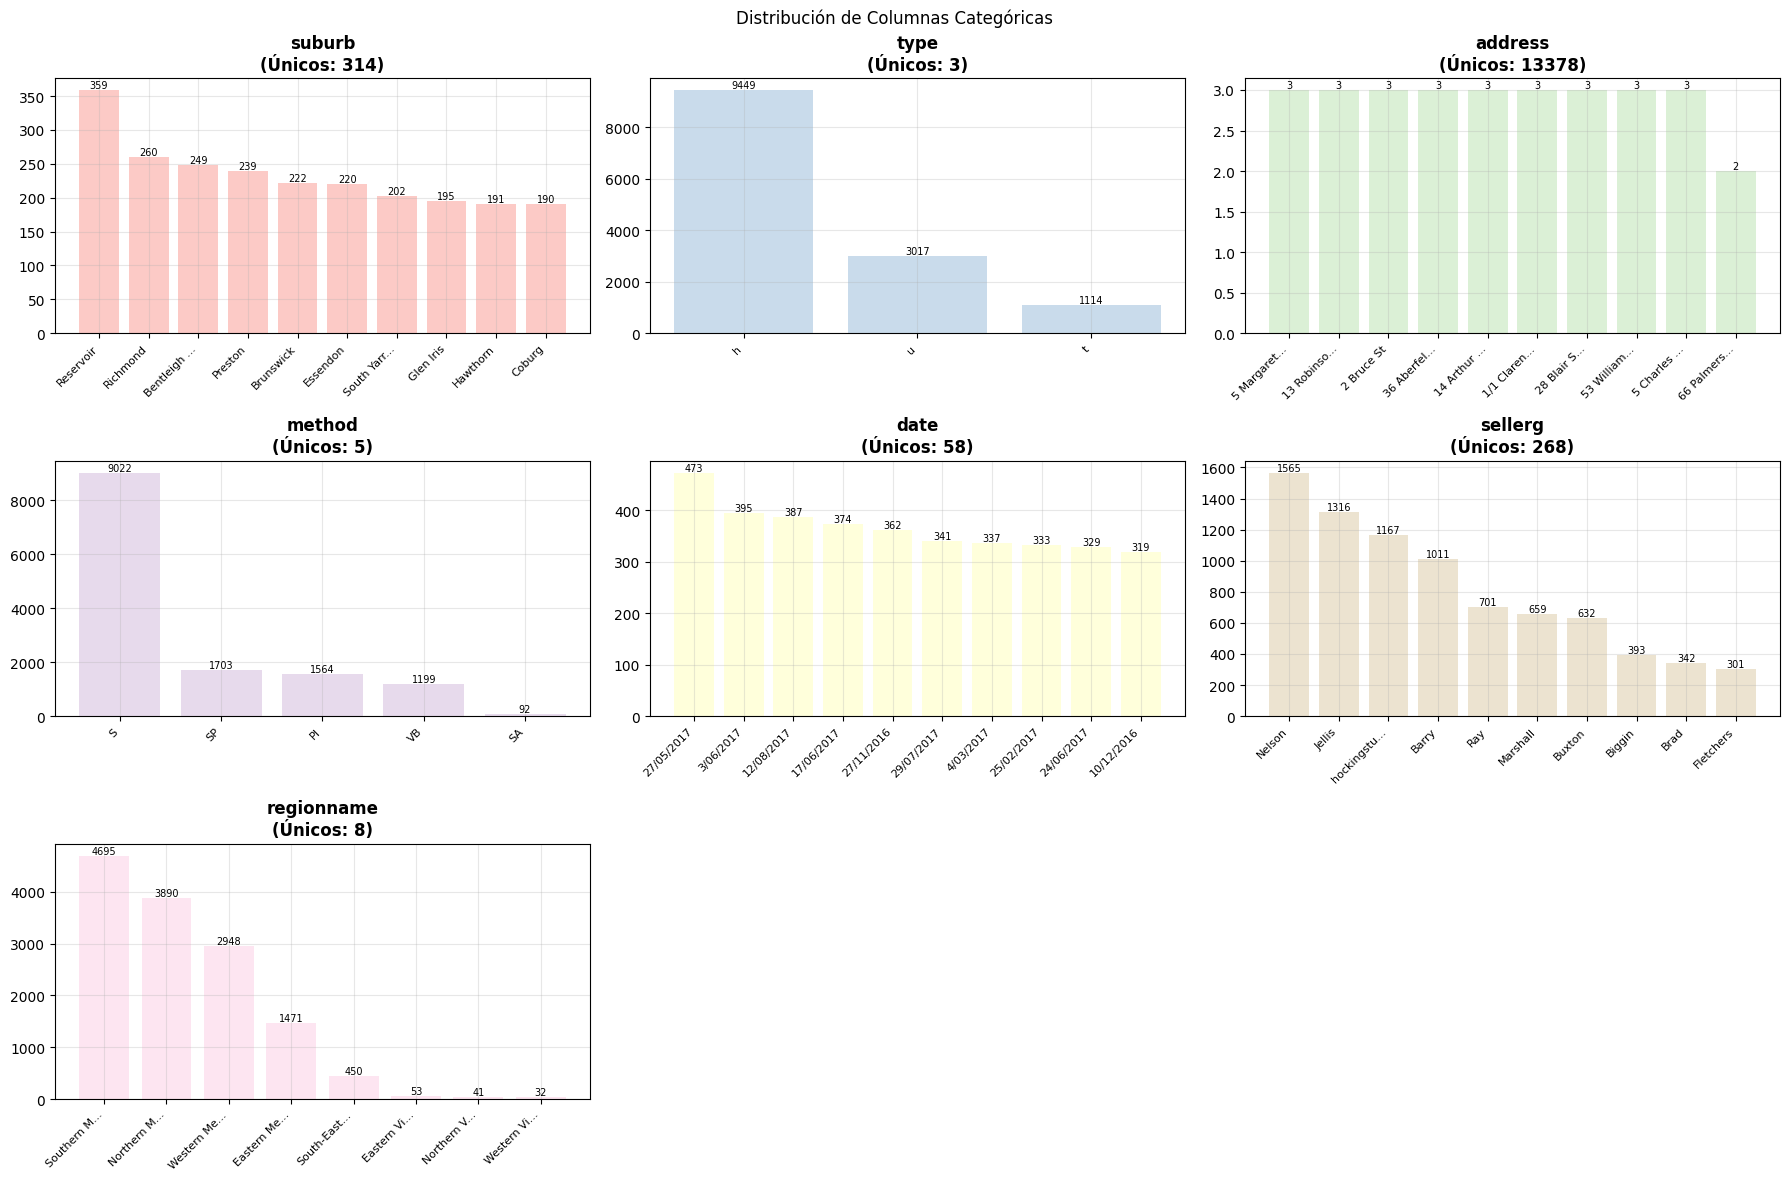

In [20]:
plot_by_dtype_subplots(df, columns_low_missing_amount)

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Columnas
num_cols = ['rooms', 'bedroom2', 'bathroom', 'landsize', 'buildingarea', 'distance', 'yearbuilt']
cat_cols = ['type', 'method', 'sellerg', 'suburb']

# Normalizar nombres de columnas
df.columns = [col.lower().replace(" ", "_") for col in df.columns]

# X e y
X = df[num_cols + cat_cols]
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Preprocesamiento ---
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='MISSING')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# --- Modelo + RFE ---
lin_reg = LinearRegression()
rfe = RFE(estimator=lin_reg, n_features_to_select=5)

# Pipeline final
pipe = Pipeline([
    ('pre', preprocessor),
    ('rfe', rfe),
    ('reg', lin_reg)
])

# Ajuste del pipeline
pipe.fit(X_train, y_train)

# Features seleccionadas
feature_names = pipe.named_steps['pre'].get_feature_names_out()
selected_mask = pipe.named_steps['rfe'].get_support()
selected_features = feature_names[selected_mask]

print("✅ Features seleccionadas por RFE:")
print(list(selected_features))

# Score en test
score = pipe.score(X_test, y_test)
print(f"\nR² del modelo en test: {score:.3f}")

✅ Features seleccionadas por RFE:
['cat__sellerg_Hall', 'cat__sellerg_Kelly', "cat__sellerg_Sotheby's", 'cat__sellerg_VICProp', 'cat__sellerg_Weast']

R² del modelo en test: -0.008


In [31]:
analyze_missing_values(df)

,Cantidad_Nulos,Porcentaje_Nulos
buildingarea,6450,47.50
yearbuilt,5375,39.58
councilarea,1369,10.08
car,62,0.46
distance_group,6,0.04
suburb,0,0.00
method,0,0.00
price,0,0.00
type,0,0.00
rooms,0,0.00


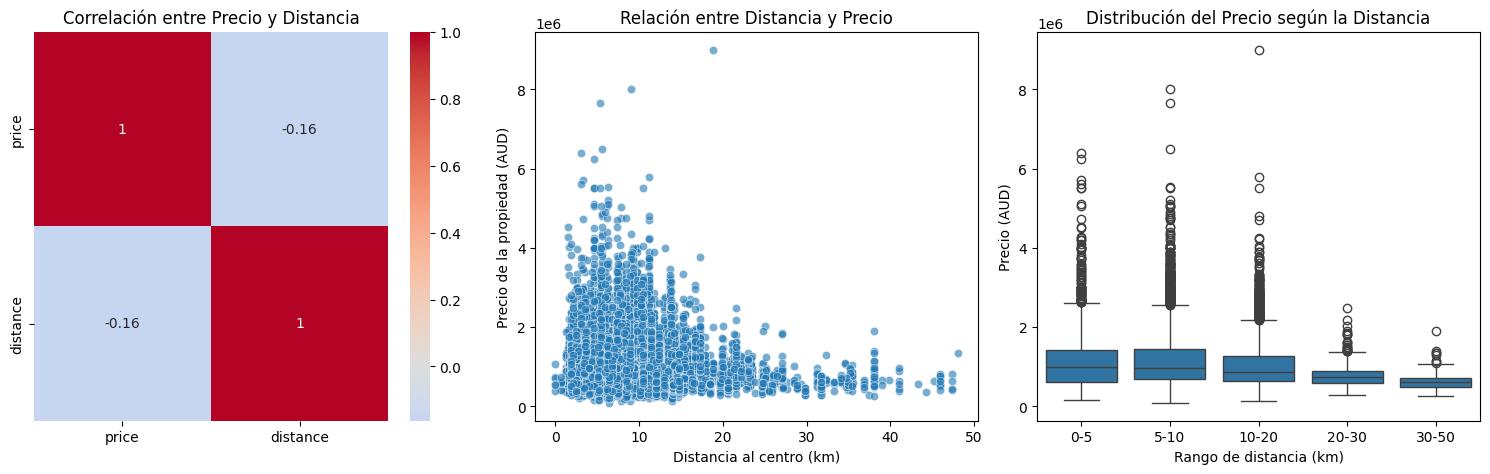

ANÁLISIS HIPÓTESIS 1
Coeficiente de correlación (r): -0.163
Valor p: 0.000000
✅ Se rechaza H₀: existe una relación lineal significativa entre la distancia y el precio.


In [24]:
# Columnas relevantes para el análisis
columns_corr = ['price', 'distance']

# --- Análisis de correlación y visualización ---

plt.figure(figsize=(15, 5))

# Gráfico 1: Mapa de correlaciones
plt.subplot(1, 3, 1)
correlation_matrix = df[columns_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Precio y Distancia')

# Gráfico 2: Dispersión Price vs Distance
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='distance', y='price', alpha=0.6)
plt.title('Relación entre Distancia y Precio')
plt.xlabel('Distancia al centro (km)')
plt.ylabel('Precio de la propiedad (AUD)')

# Gráfico 3: Boxplot para observar la dispersión del precio por zonas de distancia
plt.subplot(1, 3, 3)
df['distance_group'] = pd.cut(df['distance'], bins=[0,5,10,20,30,50], labels=['0-5','5-10','10-20','20-30','30-50'])
sns.boxplot(data=df, x='distance_group', y='price')
plt.title('Distribución del Precio según la Distancia')
plt.xlabel('Rango de distancia (km)')
plt.ylabel('Precio (AUD)')
plt.tight_layout()
plt.show()

# --- Análisis estadístico de correlación ---

from scipy.stats import pearsonr

corr_val, p_val = pearsonr(df['distance'].dropna(), df['price'].dropna())

print("ANÁLISIS HIPÓTESIS 1")
print(f"Coeficiente de correlación (r): {corr_val:.3f}")
print(f"Valor p: {p_val:.6f}")

if p_val < 0.05:
    print("✅ Se rechaza H₀: existe una relación lineal significativa entre la distancia y el precio.")
else:
    print("❌ No se rechaza H₀: no hay evidencia suficiente de relación significativa.")

In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# --- 1. Normalizar nombres de columnas a minúsculas y con guiones bajos ---
df.columns = [col.lower().replace(" ", "_") for col in df.columns]

# --- 2. Selección de columnas iniciales ---
num_cols = ['rooms', 'bedroom2', 'bathroom', 'landsize', 'buildingarea', 'distance', 'yearbuilt']
cat_cols = ['type', 'method', 'sellerg', 'suburb']

# --- 3. Separar X e y ---
X = df[num_cols + cat_cols]
y = df['price']

# --- 4. Split train-test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 5. Preprocesamiento para variables categóricas ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# --- 6. Modelo base ---
lin_reg = LinearRegression()

# --- 7. RFE para seleccionar top 5 features ---
rfe = RFE(estimator=lin_reg, n_features_to_select=5)

# --- 8. Pipeline ---
pipe = Pipeline([
    ('pre', preprocessor),
    ('rfe', rfe),
    ('reg', lin_reg)
])

# --- 9. Ajuste del pipeline ---
pipe.fit(X_train, y_train)

# --- 10. Resultados ---
feature_names = pipe.named_steps['pre'].get_feature_names_out()
selected_mask = pipe.named_steps['rfe'].get_support()
selected_features = feature_names[selected_mask]

print("✅ Features seleccionadas por RFE (minúsculas):")
print(list(selected_features))

# --- 11. Score en test ---
score = pipe.score(X_test, y_test)
print(f"\nR² del modelo en test: {score:.3f}")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Columnas
X = df[['distance']]
y = df['price']

# Imputar NaN en distance
X = SimpleImputer(strategy='median').fit_transform(X)
y = SimpleImputer(strategy='median').fit_transform(y.values.reshape(-1,1))

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Score
r2 = model.score(X_test, y_test)
print(f"R² en test: {r2:.3f}")
print(f"Coeficiente (pendiente): {model.coef_[0][0]:.3f}")
print(f"Intercepto: {model.intercept_[0]:.3f}")

R² en test: 0.027
Coeficiente (pendiente): -17668.574
Intercepto: 1253396.221
